# TAREA 3
- José Castillo

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.matlib import repmat

## Parte 1

1- Utilice una imagen descargada de internet. De dicha imagen sólo utilice una sección de 512x512 
píxeles (su imagen original debe ser igual o mayor a dicho tamaño).

In [2]:
img =cv2.imread('Ryan Gosling.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray"),plt.axis('off')
plt.show()
print(gray.shape)

(733, 735)


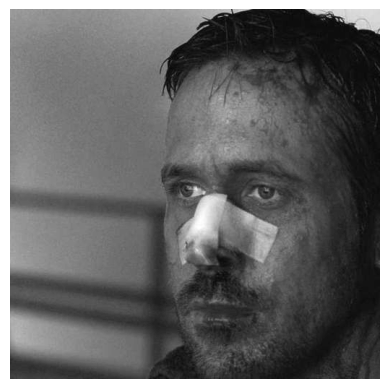

(512, 512)


In [3]:
gray_512= gray[:512, :512]
plt.imshow(gray_512,cmap="gray"),plt.axis('off')
plt.show()
print(gray_512.shape)

### Genere una imagen ruido frecuencial de 10Hz, una segunda imagen con 30Hz y una tercera imagen con 50Hz en forma vertical respectivamente (usted define la amplitud de la señal). 

In [4]:
def add_noise(imagen,A,F,ancho,largo):
    t = np.linspace(0,1,ancho)
    signal = A*np.sin(2*np.pi*F*t)
    S = repmat(signal,largo,1)
    gray_n = cv2.normalize(imagen.astype(float),None,0,1,cv2.NORM_MINMAX)
    gray_noise = cv2.add(S,gray_n)
    return gray_noise


In [5]:
noise_10HZ = add_noise(gray_512,0.1,10,512,512)
noise_30HZ = add_noise(gray_512,0.1,30,512,512)
noise_50HZ = add_noise(gray_512,0.1,50,512,512)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1),plt.imshow(noise_10HZ,cmap="gray"),plt.title("Ruido de 10 HZ"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(noise_30HZ,cmap="gray"),plt.title("Ruido de 30 HZ"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(noise_50HZ,cmap="gray"),plt.title("Ruido de 50 HZ"),plt.axis('off')


(<Axes: title={'center': 'Ruido de 50 HZ'}>,
 Text(0.5, 1.0, 'Ruido de 50 HZ'),
 (-0.5, 511.5, 511.5, -0.5))

### Genere una imagen que atenúe el ruido empleando filtros en la frecuencia para cada imagen del paso #2

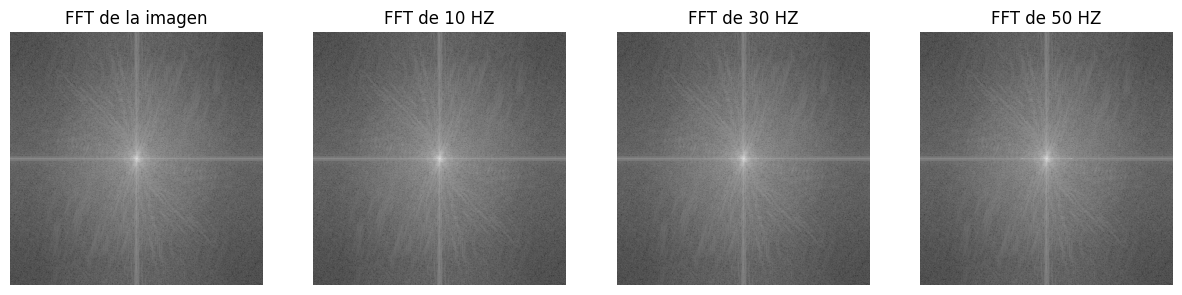

In [39]:
plt.figure(figsize=(15,10))
fft_img=np.fft.fftshift(np.fft.fft2(gray_512))
fft_noise_10HZ=np.fft.fftshift(np.fft.fft2(noise_10HZ))
fft_noise_30HZ=np.fft.fftshift(np.fft.fft2(noise_30HZ))
fft_noise_50HZ=np.fft.fftshift(np.fft.fft2(noise_50HZ))
plt.subplot(1,4,1),plt.imshow(np.log(np.abs(fft_img)),cmap="gray"),plt.title("FFT de la imagen"),plt.axis('off')
plt.subplot(1,4,2),plt.imshow(np.log(np.abs(fft_noise_10HZ)),cmap="gray"),plt.title("FFT de 10 HZ"),plt.axis('off')
plt.subplot(1,4,3),plt.imshow(np.log(np.abs(fft_noise_30HZ)),cmap="gray"),plt.title("FFT de 30 HZ"),plt.axis('off')
plt.subplot(1,4,4),plt.imshow(np.log(np.abs(fft_noise_50HZ)),cmap="gray"),plt.title("FFT de 50 HZ"),plt.axis('off')
plt.show()


Generar un filtro pasa bajos

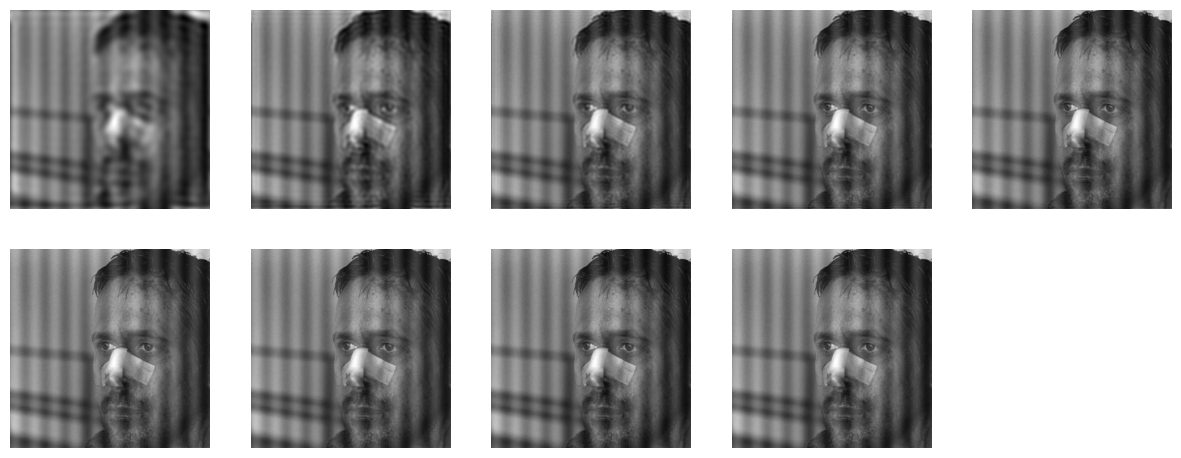

In [40]:
def filtro_pasa_bajos(imagen, r):
    filas, columnas = imagen.shape
    x = np.linspace(-127,128,filas)
    y = np.linspace(-127,128,columnas)
    Y,X = np.meshgrid(x,y)
    Z = np.sqrt(X**2+Y**2) <= r
    Z = Z*1
    fshift = np.fft.fftshift(np.fft.fft2(imagen))
    pasa_bajos_ideal = fshift*Z
    imagen_filtrada = np.fft.ifft2(np.fft.fftshift(pasa_bajos_ideal))
    imagen_filtrada = imagen_filtrada.real

    return imagen_filtrada
img_lista = []
for r in range(10, 100, 10):
    img_filtrada = filtro_pasa_bajos(noise_10HZ, r)
    img_lista.append(img_filtrada)
plt.figure(figsize=(15,15))
for i, img in enumerate(img_lista, 1):
    
    plt.subplot(5, 5, i), plt.imshow(img, cmap="gray"), plt.axis('off')
plt.show()

ValueError: too many values to unpack (expected 2)

### Para la Imagen con Ruido de 10HZ

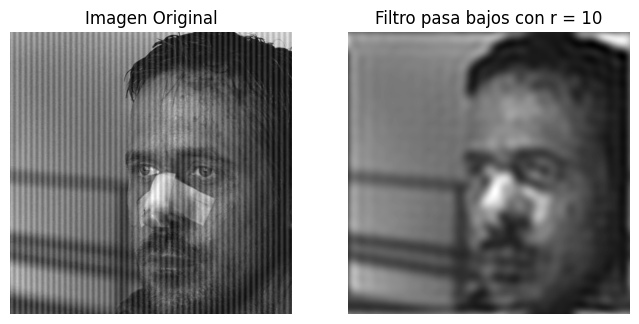

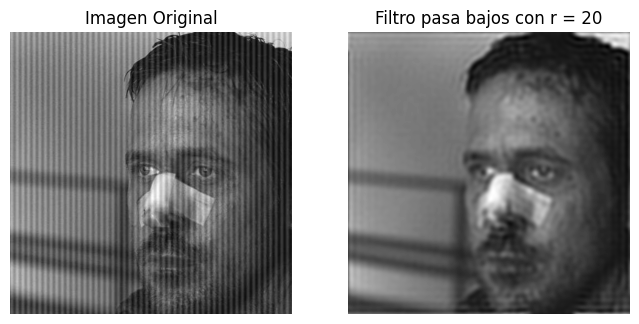

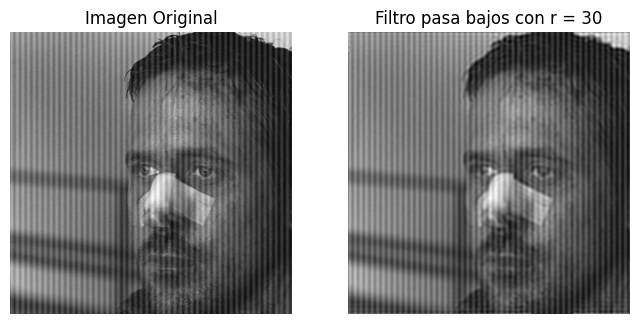

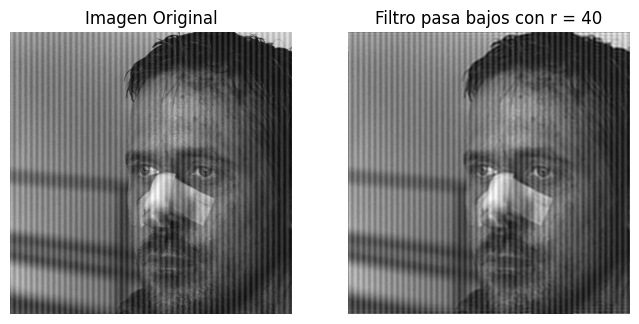

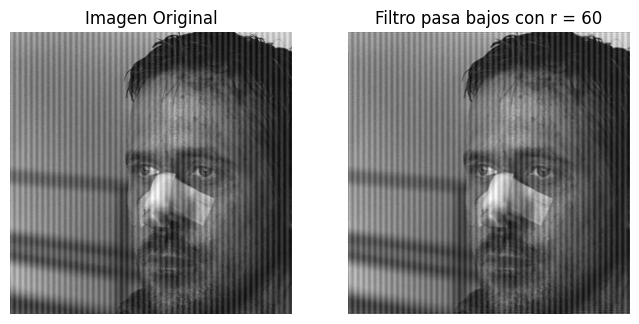

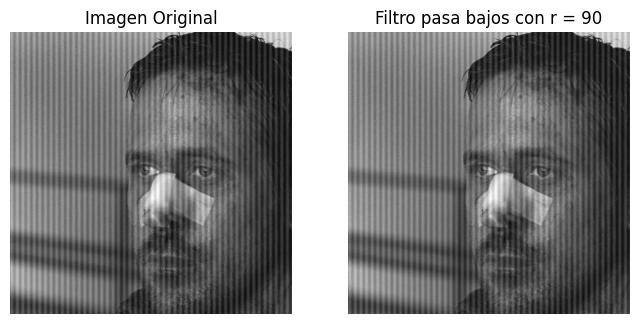

In [22]:
for r in range(10, 100, 10):
    img_filtrada = filtro_pasa_bajos(noise_50HZ, r)


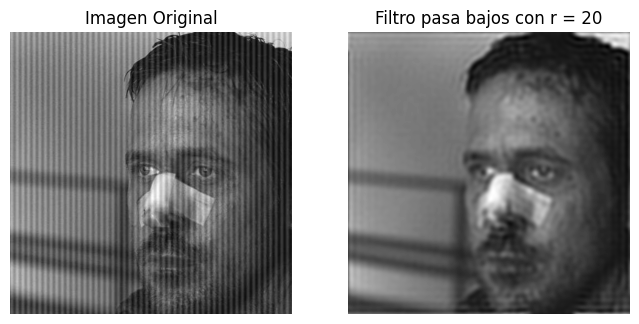

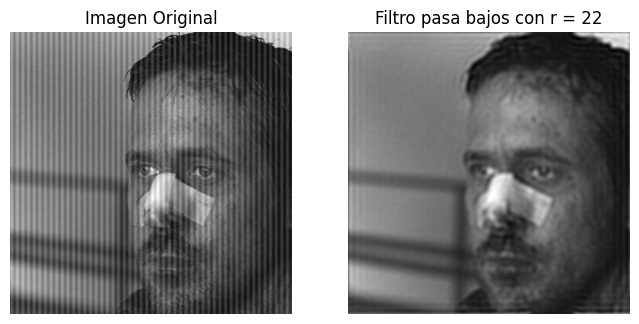

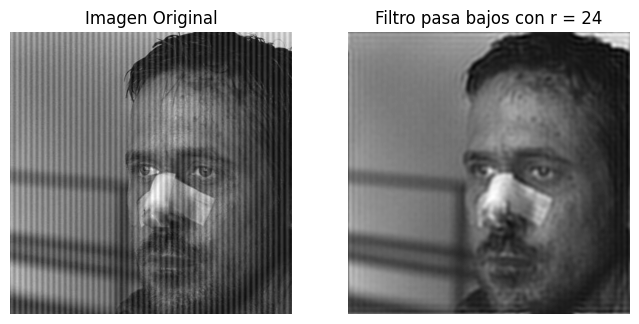

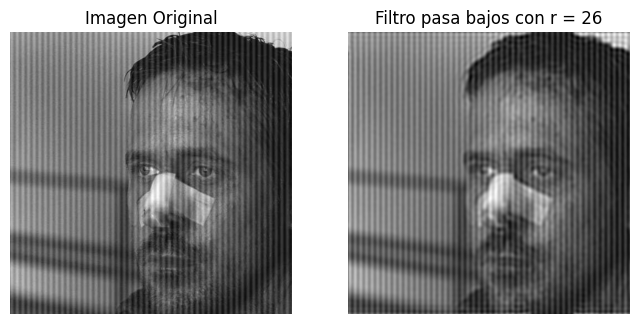

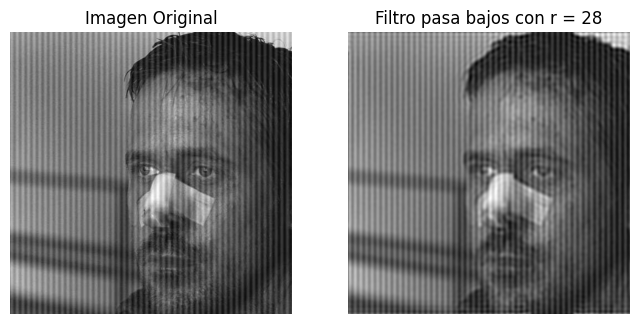

In [23]:
for r in range(20, 30, 1):
    img_filtrada = filtro_pasa_bajos(noise_50HZ, r)

### Para la Imagen con Ruido de 30HZ

### Para la Imagen con Ruido de 50HZ